In [2]:
import os 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

<Figure size 432x216 with 0 Axes>

In [3]:
Data_1 = pd.read_csv("C:/my_computer/data_file/health/Medicare_Charge_Inpatient_DRG100_DRG_Summary_by_DRG_FY2011.csv")

In [4]:
Data_2 = pd.read_csv("C:/my_computer/data_file/health/Medicare_Charge_Outpatient_APC30_Summary_by_APC_CY2011.csv")

In [5]:
Data_3 = pd.read_csv("C:/my_computer/data_file/health/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv")

In [6]:
Data_4 = pd.read_csv("C:/my_computer/data_file/health/Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv")

In [7]:
Data_1.head()

,DRG Definition,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,37861,29228.55368,6902.381289,5514.435910
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,37927,23924.98059,6809.799325,5791.920242
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,68163,49186.95644,13614.616130,12415.825360
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,110983,30371.27399,8037.269492,6858.689088
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,62346,23300.06199,5762.881821,4508.202659


In [8]:
Data_2.head()

,APC,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,275987,74.202956,16.147079
1,0013 - Level II Debridement & Destruction,434706,196.170070,56.133853
2,0015 - Level III Debridement & Destruction,509576,326.503444,97.156250
3,0019 - Level I Excision/ Biopsy,27860,2013.181972,330.908369
4,0020 - Level II Excision/ Biopsy,40642,3161.457873,567.156154


In [9]:
Data_1.rename(columns = {"DRG Definition":"Procedure", "APC":"Procedure","Total Discharges":"Services_count"},inplace = True)

In [10]:
Data_2.rename(columns = {"APC":"Procedure","Outpatient Services":"Services_count","Average Estimated Sumbitted Charges" : "Average Covered Charges"},inplace = True)

In [11]:
Data_1.drop(columns = "Average Medicare Payments", inplace = True)

In [12]:
Summ_data = pd.concat([Data_1, Data_2], axis = 0 )

In [13]:
Summ_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 29
Data columns (total 5 columns):
Average Covered Charges                100 non-null float64
Average Estimated Submitted Charges    30 non-null float64
Average Total Payments                 130 non-null float64
Procedure                              130 non-null object
Services_count                         130 non-null int64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.1+ KB


In [14]:
Data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                                163065 non-null object
Provider Id                                   163065 non-null int64
Provider Name                                 163065 non-null object
Provider Street Address                       163065 non-null object
Provider City                                 163065 non-null object
Provider State                                163065 non-null object
Provider Zip Code                             163065 non-null int64
Hospital Referral Region (HRR) Description    163065 non-null object
Total Discharges                              163065 non-null int64
Average Covered Charges                       163065 non-null float64
Average Total Payments                        163065 non-null float64
Average Medicare Payments                     163065 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 14.9+ M

In [15]:
Data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
APC                                           43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Outpatient Services                           43372 non-null int64
Average  Estimated Submitted Charges          43372 non-null float64
Average Total Payments                        43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


In [16]:
Data_3[Data_3["Provider Id"] == 10001]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1079,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,38,20312.78947,4894.763158,3865.500000
2280,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,84,38820.39286,10260.214290,9167.083333
3939,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,169,27345.10059,6542.088757,5438.508876
6208,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,33,17605.51515,4596.393939,3618.939394
8014,069 - TRANSIENT ISCHEMIA,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,37,20688.83784,4134.108108,3103.405405
9976,074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,13,18489.15385,4876.000000,4097.230769
10955,101 - SEIZURES W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,27,19619.70370,4667.222222,3249.666667
13536,176 - PULMONARY EMBOLISM W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,33,23680.30303,6020.272727,5338.090909
14932,177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,21,48240.09524,11634.523810,10553.238100


In [17]:
inp_data = Data_3.rename(columns = {"DRG Definition":"Procedure", "Total Discharges":"Services_count"})

In [18]:
inp_data.drop(columns = "Average Medicare Payments", inplace = True)

In [19]:
out_data = Data_4.rename(columns = { "APC":"Procedure","Outpatient Services":"Services_count",
                                    "Average  Estimated Submitted Charges" : "Average Covered Charges"})

In [20]:
inp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
Procedure                                     163065 non-null object
Provider Id                                   163065 non-null int64
Provider Name                                 163065 non-null object
Provider Street Address                       163065 non-null object
Provider City                                 163065 non-null object
Provider State                                163065 non-null object
Provider Zip Code                             163065 non-null int64
Hospital Referral Region (HRR) Description    163065 non-null object
Services_count                                163065 non-null int64
Average Covered Charges                       163065 non-null float64
Average Total Payments                        163065 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 13.7+ MB


In [21]:
out_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
Procedure                                     43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Services_count                                43372 non-null int64
Average Covered Charges                       43372 non-null float64
Average Total Payments                        43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


In [22]:
inp_out = pd.concat([inp_data, out_data], axis = 0 )

In [23]:
inp_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206437 entries, 0 to 43371
Data columns (total 11 columns):
Procedure                                     206437 non-null object
Provider Id                                   206437 non-null int64
Provider Name                                 206437 non-null object
Provider Street Address                       206437 non-null object
Provider City                                 206437 non-null object
Provider State                                206437 non-null object
Provider Zip Code                             206437 non-null int64
Hospital Referral Region (HRR) Description    206437 non-null object
Services_count                                206437 non-null int64
Average Covered Charges                       206437 non-null float64
Average Total Payments                        206437 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 18.9+ MB


In [24]:
inp_out.head()

,Procedure,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Services_count,Average Covered Charges,Average Total Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333


In [25]:
summ_proc = inp_out.groupby("Procedure")["Average Covered Charges"].agg(np.mean).reset_index()

In [26]:
summ_proc.sort_values(by = "Average Covered Charges", ascending = False, inplace = True)

In [27]:
summ_proc.head(10)

,Procedure,Average Covered Charges
122,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,163227.335864
51,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,143428.055060
121,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,139186.354961
82,329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,135330.944034
56,246 - PERC CARDIOVASC PROC W DRUG-ELUTING STEN...,96348.810617
96,460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,95568.280602
53,238 - MAJOR CARDIOVASC PROCEDURES W/O MCC,85010.453136
60,252 - OTHER VASCULAR PROCEDURES W MCC,83502.960938
97,469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,81704.230791
100,480 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOIN...,75339.618456


### Part 1 B - Highest cost claim by provider is  "UVA health Science Center"

In [28]:
summ_provider = inp_out.groupby("Provider Name")["Average Covered Charges"].agg(np.mean).reset_index()

In [29]:
summ_provider.sort_values(by = "Average Covered Charges", ascending = False, inplace = True)

In [30]:
summ_provider.head(10)

,Provider Name,Average Covered Charges
3004,UVA HEALTH SCIENCES CENTER,211922.000000
202,BAYONNE HOSPITAL CENTER,147441.337388
2800,TEMPLE UNIVERSITY HOSPITAL,126824.329151
661,DOCTORS MEDICAL CENTER,124259.344079
590,CROZER CHESTER MEDICAL CENTER,113394.785604
1987,ORTHOCOLORADO HOSPITAL AT ST ANTHONY MED CAMPUS,110148.763115
3061,WASHINGTON HOSPITAL,108886.509762
1887,NORTHBAY MEDICAL CENTER,107612.036422
1230,JOHN MUIR MEDICAL CENTER - CONCORD CAMPUS,106743.028135
2209,REGIONAL MEDICAL CENTER OF SAN JOSE,105257.411017


### End of Part 1 B

In [31]:
inp_out["Average Covered Charges"].describe()

count    206437.000000
mean      28851.969375
std       34224.593997
min          12.643750
25%        9364.575000
50%       19764.125000
75%       36813.855860
max      929118.909100
Name: Average Covered Charges, dtype: float64

In [32]:
inp_out["cost_group"] = pd.qcut(inp_out["Average Covered Charges"],10,labels = [1,2,3,4,5,6,7,8,9,10])

In [33]:
inp_out["Proc"] = inp_out["Procedure"].str.slice(start=0, stop=3)

### Part 1 C - Highest cost claim by Region is  Brooklyn

In [34]:
check_region = inp_out.loc[inp_out["Proc"].isin(["870","207","853","329","246"]),["Proc","Provider City"]]

In [35]:
check_2 = pd.crosstab(index = check_region["Proc"],columns = check_region["Provider City"],values = check_region["Provider City"], aggfunc = "count").T

In [36]:
check_2  = check_2.reset_index()

In [37]:
check_2

Proc,Provider City,207,246,329,853,870
0,ABERDEEN,1.0,NaN,1.0,1.0,1.0
1,ABILENE,2.0,2.0,2.0,1.0,1.0
2,ABINGDON,1.0,NaN,NaN,1.0,NaN
3,ABINGTON,1.0,1.0,1.0,1.0,1.0
4,ADA,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...
1144,YORK,1.0,1.0,2.0,1.0,1.0
1145,YOUNGSTOWN,1.0,1.0,1.0,2.0,2.0
1146,YUMA,1.0,1.0,1.0,1.0,1.0
1147,ZANESVILLE,1.0,1.0,1.0,1.0,NaN


In [38]:
for i in check_2.columns.difference(["Proc"]):
    check_3 = check_2.loc[check_2[i] == check_2[i].max(),[i,"Provider City"]]
    print(check_3)

Proc   207 Provider City
171   16.0       CHICAGO
Proc  246 Provider City
445   8.0       HOUSTON
801   8.0       PHOENIX
Proc   329 Provider City
171   11.0       CHICAGO
Proc   853 Provider City
171   14.0       CHICAGO
Proc   870 Provider City
120   14.0      BROOKLYN
Proc Provider City Provider City
1148   ZEPHYRHILLS   ZEPHYRHILLS


### End of Part 1 C (chicago, brooklyn, Housten, Phoenix are the region with expensive procedures)

In [39]:
inp_out

,Procedure,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Services_count,Average Covered Charges,Average Total Payments,cost_group,Proc
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.076920,5777.241758,8,039
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.857140,5787.571429,4,039
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.375000,5434.958333,8,039
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.280000,5417.560000,4,039
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.277780,5658.333333,7,039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43367,0698 - Level II Eye Tests & Treatments,520098,UNIVERSITY OF WI HOSPITALS & CLINICS AUTHORITY,600 HIGHLAND AVENUE,MADISON,WI,53792,WI - Madison,2852,211.752854,71.776392,1,069
43368,0698 - Level II Eye Tests & Treatments,520100,BELOIT MEM HSPTL,1969 W HART RD,BELOIT,WI,53511,WI - Madison,912,164.068882,65.369989,1,069
43369,0698 - Level II Eye Tests & Treatments,520116,UW HLTH PARTNERS - WATERTOWN REGIONAL MEDICAL CTR,125 HOSPITAL DR,WATERTOWN,WI,53098,WI - Madison,188,119.579787,67.520000,1,069
43370,0698 - Level II Eye Tests & Treatments,520177,FROEDTERT MEM LUTHERAN HSPTL,9200 W WISCONSIN AVE,MILWAUKEE,WI,53226,WI - Milwaukee,1554,155.406969,66.719949,1,069


### Part 1 A  STANFORD HOSPITAL  seems to have the highest cost variation

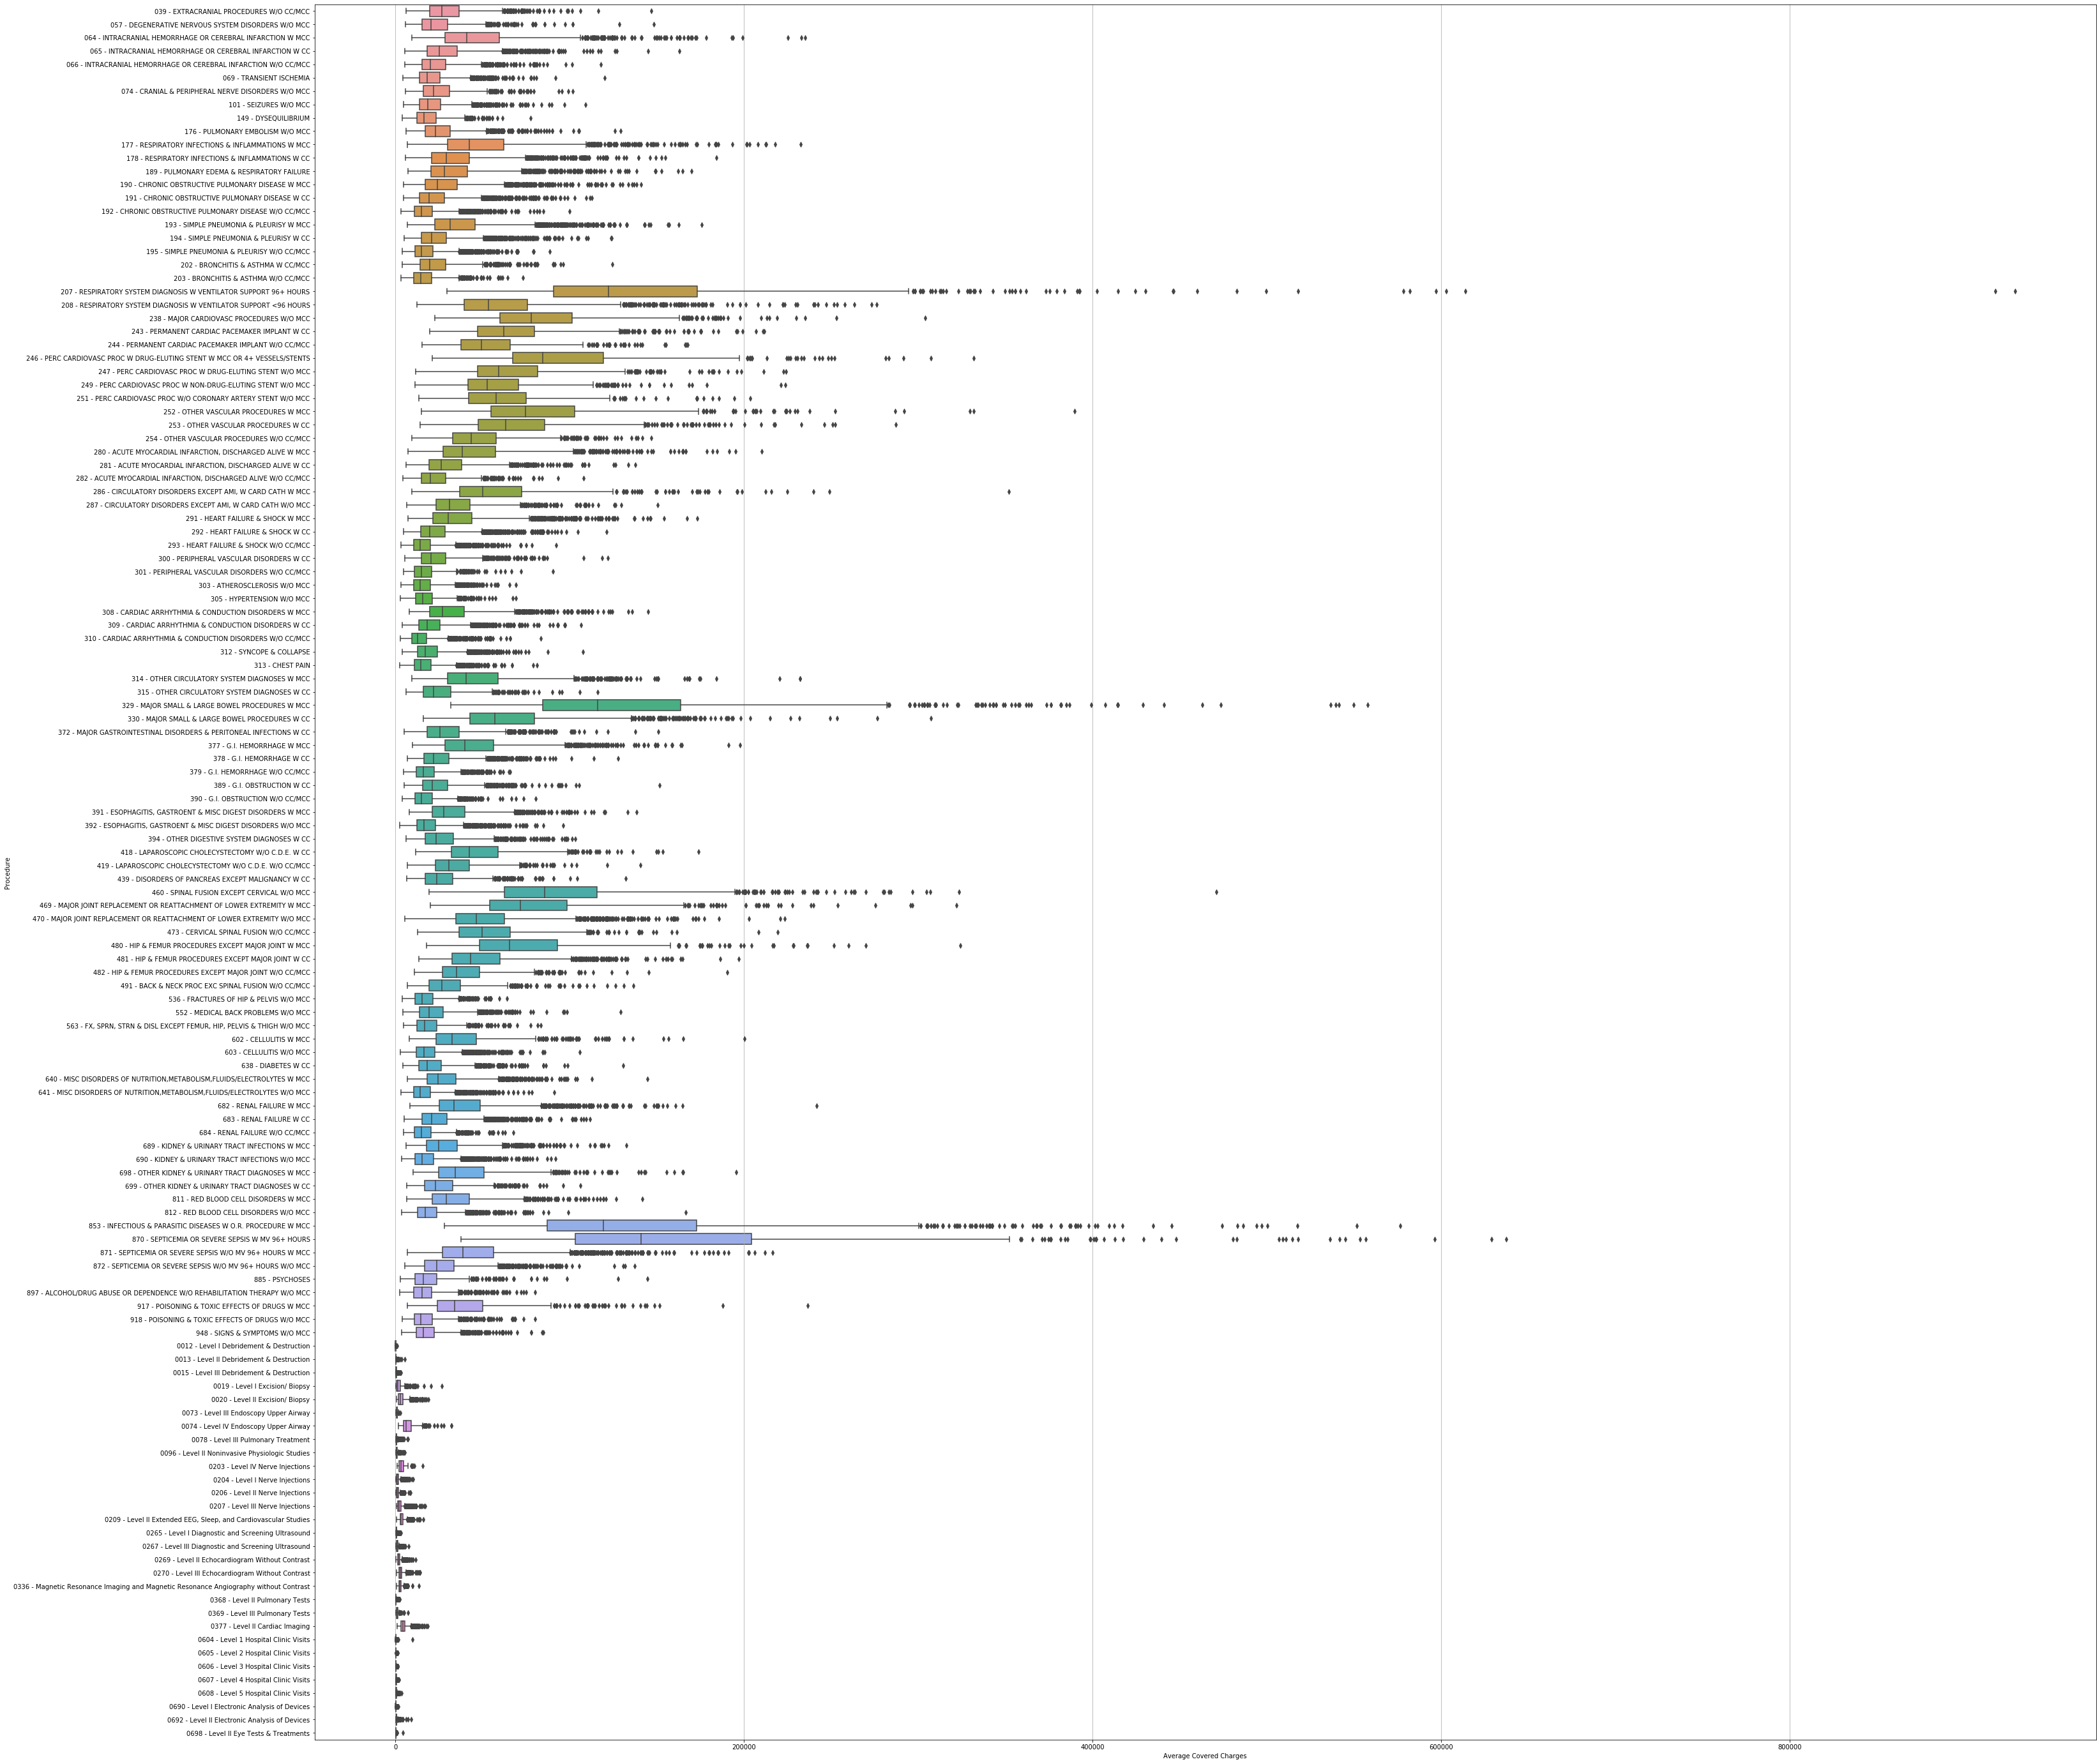

In [40]:
plt.figure(figsize=(50,50))

sns.boxplot(x =  "Average Covered Charges", y = "Procedure", data = inp_out)


##### 917, 885, 682, 286, 252, 480, 870, 853, 460, 329, 314, 207 procedured seems to have higher cost varaince/ outlier

### As per below analysis, below provider name have the highest variance out of which 207, 286, 460, 480, 682 and 917 has the highest variance out of which Provider like Standford, washington, lourdes medical, garfield, northbay seems to have highest variance

##### 207 -- STANFORD HOSPITAL  929118.9091
##### 207 --  WASHINGTON HOSPITAL  918023.1818
##### 252 -- CROZER CHESTER MEDICAL CENTER
##### 286 --  STANFORD HOSPITAL
##### 460 -  LOURDES MEDICAL CENTER OF BURLINGTON COUNTY 
##### 480 - Stanford
#####  682 -  GARFIELD MEDICAL CENTER 
##### 853 - Wshington
##### 870 -  STANFORD HOSPITAL  637377.7143,  NORTHBAY MEDICAL CENTER
#####  917  NORTHBAY MEDICAL CENTER  628730.4000

In [41]:
summ = inp_out.pivot_table(index = "Provider Name" ,columns = "Proc", values = "Average Covered Charges",aggfunc = "mean").reset_index()

In [42]:
summ.fillna(0)

Proc,Provider Name,001,002,007,009,020,026,027,033,036,037,039,057,060,064,065,066,069,074,101,149,176,177,178,189,190,191,192,193,194,195,202,203,207,208,238,243,244,246,247,249,251,252,253,254,280,281,282,286,287,291,292,293,300,301,303,305,308,309,310,312,313,314,315,329,330,372,377,378,379,389,390,391,392,394,418,419,439,460,469,470,473,480,481,482,491,536,552,563,602,603,638,640,641,682,683,684,689,690,698,699,811,812,853,870,871,872,885,897,917,918,948
0,ABBEVILLE GENERAL HOSPITAL,0.000000,0.000000,474.600000,0.000000,1678.255618,735.055789,0.000000,0.000000,219.118421,0.000000,0.00000,0.000000,127.870238,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,24959.58333,0.00000,0.00000,0.000000,17578.866670,0.00000,17579.666670,13733.086960,16665.562500,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.0000,0.00000,27433.11111,16700.653850,11048.52632,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,14184.413790,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,30701.07692,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,11365.520000,0.00000,0.00000,9696.448980,8132.75000,16317.28571,0.000000,17584.71429,13101.017860,0.00000,0.00000,0.00000,15928.26316,0.00000,0.00000,0.00000,26643.33333,0.00000,0.00000,0.00000,0.00000,0.000000
1,ABBOTT NORTHWESTERN HOSPITAL,310.163709,6081.384091,2821.906363,1283.189655,2119.269916,1139.336831,3635.541026,1851.117609,741.521532,5224.818818,34628.73810,28584.847830,222.727403,55488.72973,33238.40833,29369.666670,10173.076191,24013.736840,24252.62921,18080.65000,28946.52778,62156.77049,35716.41667,40459.57778,41711.98551,30646.942030,16444.741940,38325.62821,24728.280370,18131.260870,30775.538460,0.00000,187587.36110,86476.84375,88877.71605,76127.48101,53099.54430,91786.00000,53916.814010,48365.76000,76266.73500,104532.50940,76218.35000,51806.11111,65704.325580,35989.00000,25212.53846,118167.3731,39006.71171,47585.57273,35723.232880,24523.75000,24576.00000,19483.857140,16973.18519,0.00000,41488.37333,23065.476920,18409.581970,19850.78313,20919.775510,44646.25000,26271.76471,146015.0926,74723.833330,31866.30612,57289.71429,31146.792080,16697.266670,24671.44118,20285.212120,36727.50000,22966.932490,32212.51563,44729.70270,30815.238100,30876.72727,97751.60450,105840.84620,55225.61055,49440.45070,85548.80000,59539.178570,0.00000,25523.238940,20092.26316,22374.807230,17784.181820,52474.36000,24635.547170,29397.86364,30546.76596,20554.686750,42134.12048,29162.16129,19385.437500,40797.61364,19838.467210,32212.41667,25032.21739,33264.60000,27073.34694,156945.67210,189553.87500,61477.59296,35928.38554,38999.39583,25611.75000,43696.53333,35235.26087,21331.342110
2,ABILENE REGIONAL MEDICAL CENTER,310.750000,3320.585000,0.000000,598.805556,0.000000,2113.190360,0.000000,5158.740464,324.342857,7894.032359,35184.16667,0.000000,518.536860,0.00000,52302.44000,31730.090910,0.000000,0.000000,0.00000,0.00000,59179.61538,0.00000,56629.83333,47720.54545,59078.33333,44251.948720,32858.375000,73415.81818,52834.196720,37035.280000,0.000000,0.00000,187086.15380,87178.13333,106516.78260,113424.85190,99633.46512,178491.97730,113828.510500,93493.61905,0.00000,156237.00000,70429.90000,62775.48148,0.000000,0.00000,0.00000,73197.6875,41968.76296,46996.93750,41207.166670,32209.55000,36775.83333,0.000000,0.00000,0.00000,54043.50000,37351.000000,20186.341460,32460.06250,22481.466670,65530.47059,35249.58333,129949.5714,0.000000,0.00000,57881.93333,59568.609760,36011.357140,57741.06667,0.000000,0.00000,40067.333330,47965.27273,70827.42857,0.000000,0.00000,93311.76471,0.00000,71098.34211,48110.63636,0.00000,59265.666670,50749.83333,0.000000,0.00000,0.000000,0.000000,0.00000,37844.857140,36667.07143,0.00000,30384.860470,46254.69231,48498.60714,0.000000,0.00000,27520.192310,0.00000,0.0

In [43]:
summ1 = summ.filter(["Provider Name","917", "885", "682","286","252","480","870","853","460","329","314","207"],axis=1)

In [44]:
summ1.fillna(0)

Proc,Provider Name,917,885,682,286,252,480,870,853,460,329,314,207
0,ABBEVILLE GENERAL HOSPITAL,0.00000,0.00000,8132.75000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000
1,ABBOTT NORTHWESTERN HOSPITAL,43696.53333,38999.39583,42134.12048,118167.3731,104532.50940,85548.80000,189553.87500,156945.67210,97751.60450,146015.0926,44646.25000,187587.36110
2,ABILENE REGIONAL MEDICAL CENTER,0.00000,0.00000,46254.69231,73197.6875,156237.00000,0.00000,0.00000,0.00000,93311.76471,129949.5714,65530.47059,187086.15380
3,ABINGTON MEMORIAL HOSPITAL,71358.85000,0.00000,78248.75000,118367.1600,176813.14710,130666.53850,269405.22220,218656.00000,71097.87273,252152.4000,99861.62069,274009.50000
4,ACMH HOSPITAL,0.00000,10044.03175,12685.07692,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,YAVAPAI REGIONAL MEDICAL CENTER-EAST,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000
3197,YORK HOSPITAL,17057.20000,0.00000,18777.29730,35972.9000,44426.58824,51045.34375,90716.45161,69991.35593,59412.17647,68381.2500,30246.24138,75054.28571
3198,YUKON KUSKOKWIM DELTA REG HOSPITAL,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000
3199,YUMA REGIONAL MEDICAL CENTER,0.00000,0.00000,32260.38889,0.0000,0.00000,86790.07143,123235.21050,93307.34375,104030.23810,119406.0000,34076.12500,119922.00000


In [45]:
for i in summ1.columns.difference(["Provider Name"]):
    check = summ1.loc[summ1[i] >= summ1[i].quantile(0.98),["Provider Name",i]].sort_values(by = i, ascending = False)
    print(check)

Proc                                   Provider Name          207
2730                               STANFORD HOSPITAL  929118.9091
3061                             WASHINGTON HOSPITAL  918023.1818
2800                      TEMPLE UNIVERSITY HOSPITAL  613926.6071
1550             MEADOWLANDS HOSPITAL MEDICAL CENTER  602981.3784
387                      CEDARS-SINAI MEDICAL CENTER  596878.0263
590                    CROZER CHESTER MEDICAL CENTER  581801.9211
344         CAPITAL HEALTH MEDICAL CENTER - HOPEWELL  578212.7500
2419                            SETON MEDICAL CENTER  517956.6250
2176             PROVIDENCE SAINT JOSEPH MEDICAL CTR  499678.3571
1231  JOHN MUIR MEDICAL CENTER - WALNUT CREEK CAMPUS  482621.8261
299                         BROOKWOOD MEDICAL CENTER  459985.2727
345                CAPITAL HEALTH SYSTEM-FULD CAMPUS  446585.1429
888                          GARFIELD MEDICAL CENTER  446155.3438
1576                    MEDICAL CITY DALLAS HOSPITAL  430219.2381
661       

### End of PART 1 A 

##### As per above analysis

##### 207 -- STANFORD HOSPITAL  929118.9091
##### 207 --  WASHINGTON HOSPITAL  918023.1818
##### 252 -- CROZER CHESTER MEDICAL CENTER
##### 286 --  STANFORD HOSPITAL
##### 460 -  LOURDES MEDICAL CENTER OF BURLINGTON COUNTY 
##### 480 - Stanford
#####  682 -  GARFIELD MEDICAL CENTER 
##### 853 - Wshington
##### 870 -  STANFORD HOSPITAL  637377.7143,  NORTHBAY MEDICAL CENTER
#####  917  NORTHBAY MEDICAL CENTER  628730.4000

### Part 1 D , Beth Israel  provider has the highest number of procedures

In [46]:
inp_out.groupby("Provider Name")["Procedure"].agg("nunique").reset_index().sort_values(by = "Procedure", ascending = False)

,Provider Name,Procedure
237,BETH ISRAEL DEACONESS MEDICAL CENTER,129
1515,MASSACHUSETTS GENERAL HOSPITAL,128
1388,LEE MEMORIAL HOSPITAL,128
2993,UPMC PRESBYTERIAN SHADYSIDE,128
2316,SAINT FRANCIS MEDICAL CENTER,128
...,...,...
1701,METHODIST WEST HOUSTON HOSPITAL,1
215,BEAVER VALLEY HOSPITAL,1
478,CLAREMORE INDIAN HOSPITAL,1
2097,PHS INDIAN HOSPITAL AT PINE RIDGE,1


In [47]:
inp_out.head()

,Procedure,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Services_count,Average Covered Charges,Average Total Payments,cost_group,Proc
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,8,039
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4,039
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,8,039
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4,039
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,7,039


In [48]:
inp_out["Diff"] = np.abs(inp_out["Average Total Payments"] - inp_out["Average Covered Charges"])

### Washington and stanford has the highest difference between claims made and payment received

In [49]:
inp_out.groupby("Provider Name")["Diff"].agg("max").reset_index().sort_values(by = "Diff", ascending = False)

,Provider Name,Diff
3061,WASHINGTON HOSPITAL,798910.181800
2730,STANFORD HOSPITAL,772960.727300
1550,MEADOWLANDS HOSPITAL MEDICAL CENTER,547388.405430
590,CROZER CHESTER MEDICAL CENTER,546649.658540
1887,NORTHBAY MEDICAL CENTER,544112.500000
...,...,...
2098,PHS INDIAN HOSPITAL AT ROSEBUD,268.533333
1188,J PAUL JONES HOSPITAL,235.666667
3010,VALLEY FORGE MEDICAL CENTER AND HOSPITAL,124.207793
684,EAGLEVILLE HOSPITAL,72.098361


### Part 2 A - Providers least like others,  these providers id 310025,390027,50464

### K-Nearest Neighbors

##### Important Tuning Parameters for KNN: 
- n_neighbors - The number of nearest neighbors K in the K-NN algorithm
- weights - weight function used in predictions.

In [50]:
inp_out

,Procedure,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Services_count,Average Covered Charges,Average Total Payments,cost_group,Proc,Diff
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.076920,5777.241758,8,039,27185.835162
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.857140,5787.571429,4,039,9344.285711
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.375000,5434.958333,8,039,32125.416667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.280000,5417.560000,4,039,8580.720000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.277780,5658.333333,7,039,25974.944447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43367,0698 - Level II Eye Tests & Treatments,520098,UNIVERSITY OF WI HOSPITALS & CLINICS AUTHORITY,600 HIGHLAND AVENUE,MADISON,WI,53792,WI - Madison,2852,211.752854,71.776392,1,069,139.976462
43368,0698 - Level II Eye Tests & Treatments,520100,BELOIT MEM HSPTL,1969 W HART RD,BELOIT,WI,53511,WI - Madison,912,164.068882,65.369989,1,069,98.698893
43369,0698 - Level II Eye Tests & Treatments,520116,UW HLTH PARTNERS - WATERTOWN REGIONAL MEDICAL CTR,125 HOSPITAL DR,WATERTOWN,WI,53098,WI - Madison,188,119.579787,67.520000,1,069,52.059787
43370,0698 - Level II Eye Tests & Treatments,520177,FROEDTERT MEM LUTHERAN HSPTL,9200 W WISCONSIN AVE,MILWAUKEE,WI,53226,WI - Milwaukee,1554,155.406969,66.719949,1,069,88.687021


In [51]:
summ = inp_out.groupby("Provider Id")["Average Covered Charges"].agg(np.mean).reset_index()

In [52]:
summ = summ.set_index("Provider Id")

In [53]:
summ["Average Covered Charges"] = summ["Average Covered Charges"]/1000

In [54]:
summ

,Average Covered Charges
Provider Id,
10001,28.586209
10005,12.274225
10006,31.024470
10007,9.134042
10008,11.509189
...,...
670072,9.132273
670073,26.091040
670075,33.840391


In [55]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

In [56]:
pairwise_top = pd.DataFrame(
    squareform(pdist(summ)),
    columns = summ.index,
    index = summ.index)

In [57]:
pairwise_top = pairwise_top.rename_axis(index=None, columns=None)

In [58]:
pairwise_top1 = pairwise_top.describe().T

In [59]:
pairwise_top1

,count,mean,std,min,25%,50%,75%,max
10001,3337.0,13.504423,10.727649,0.0,5.989948,12.389892,18.774464,183.335791
10005,3337.0,14.250269,15.310144,0.0,3.929627,8.915137,18.979440,199.647775
10006,3337.0,14.580069,10.472136,0.0,6.970595,13.881715,20.503910,180.897530
10007,3337.0,16.242031,16.177344,0.0,4.299747,11.845356,22.119623,202.787958
10008,3337.0,14.670489,15.552473,0.0,3.934573,9.566788,19.744476,200.412811
...,...,...,...,...,...,...,...,...
670072,3337.0,16.243343,16.177731,0.0,4.301516,11.847124,22.121392,202.789727
670073,3337.0,12.680945,11.116894,0.0,5.159621,11.137737,17.155992,185.830960
670075,3337.0,16.089165,10.334961,0.0,8.331191,15.720415,22.792478,178.081609
670076,3337.0,15.786881,10.347234,0.0,8.103905,15.315014,22.348114,178.611389


In [60]:
pairwise_top1.sort_values(by= "mean",ascending = False,inplace = True)

In [61]:
pairwise_top1[1:20]

,count,mean,std,min,25%,50%,75%,max
310025,3337.0,122.758963,16.524914,0.0,116.187672,126.461940,134.838043,146.711083
390027,3337.0,102.166668,16.419992,0.0,95.570664,105.844932,114.221035,126.094075
50464,3337.0,99.606295,16.401898,0.0,93.005679,103.279947,111.656050,123.529090
390180,3337.0,88.767783,16.305668,0.0,82.141393,92.436144,100.791491,112.664531
60124,3337.0,85.531488,16.273320,0.0,78.895370,89.190122,97.547793,109.418509
50195,3337.0,84.273774,16.257850,0.0,77.633117,87.927868,96.285540,108.156255
50367,3337.0,83.004647,16.239024,0.0,76.358644,86.653395,95.011066,106.881782
50496,3337.0,82.139806,16.224018,0.0,75.489635,85.784387,94.142058,106.012774
50125,3337.0,80.662202,16.194930,0.0,74.004018,84.298770,92.656441,106.664589
50441,3337.0,80.171976,16.184122,0.0,73.510836,83.805588,92.163259,107.157771


In [62]:
inp_out[inp_out["Provider Id"].isin([310025,390027,50464])]

,Procedure,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Services_count,Average Covered Charges,Average Total Payments,cost_group,Proc,Diff
114,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50464,DOCTORS MEDICAL CENTER,1441 FLORIDA AVENUE,MODESTO,CA,95350,CA - Modesto,35,72225.314290,8882.771429,10,039,63342.542861
1766,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,310025,BAYONNE HOSPITAL CENTER,29 EAST 29TH ST,BAYONNE,NJ,7002,NJ - Newark,13,128464.692300,6503.307692,10,057,121961.384608
2024,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,390027,TEMPLE UNIVERSITY HOSPITAL,3401 NORTH BROAD STREET,PHILADELPHIA,PA,19140,PA - Philadelphia,21,72530.428570,11260.809520,10,057,61269.619050
2480,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50464,DOCTORS MEDICAL CENTER,1441 FLORIDA AVENUE,MODESTO,CA,95350,CA - Modesto,38,232751.368400,18404.447370,10,064,214346.921030
3246,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,310025,BAYONNE HOSPITAL CENTER,29 EAST 29TH ST,BAYONNE,NJ,7002,NJ - Newark,19,137207.315800,12235.421050,10,064,124971.894750
3553,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,390027,TEMPLE UNIVERSITY HOSPITAL,3401 NORTH BROAD STREET,PHILADELPHIA,PA,19140,PA - Philadelphia,36,154644.027800,21040.027780,10,064,133604.000020
4220,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50464,DOCTORS MEDICAL CENTER,1441 FLORIDA AVENUE,MODESTO,CA,95350,CA - Modesto,58,125909.741400,10107.120690,10,065,115802.620710
5234,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,310025,BAYONNE HOSPITAL CENTER,29 EAST 29TH ST,BAYONNE,NJ,7002,NJ - Newark,24,162922.500000,18080.416670,10,065,144842.083330
5653,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,390027,TEMPLE UNIVERSITY HOSPITAL,3401 NORTH BROAD STREET,PHILADELPHIA,PA,19140,PA - Philadelphia,33,112888.303000,13905.848480,10,065,98982.454520
6417,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50464,DOCTORS MEDICAL CENTER,1441 FLORIDA AVENUE,MODESTO,CA,95350,CA - Modesto,30,79306.433330,7712.833333,10,066,71593.599997


### Part 2 B - Region least like others,  CA Contra costa, CA san jose, CA modesto

### K-Nearest Neighbors

##### Important Tuning Parameters for KNN: 
- n_neighbors - The number of nearest neighbors K in the K-NN algorithm
- weights - weight function used in predictions.

In [63]:
inp_out

,Procedure,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Services_count,Average Covered Charges,Average Total Payments,cost_group,Proc,Diff
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.076920,5777.241758,8,039,27185.835162
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.857140,5787.571429,4,039,9344.285711
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.375000,5434.958333,8,039,32125.416667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.280000,5417.560000,4,039,8580.720000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.277780,5658.333333,7,039,25974.944447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43367,0698 - Level II Eye Tests & Treatments,520098,UNIVERSITY OF WI HOSPITALS & CLINICS AUTHORITY,600 HIGHLAND AVENUE,MADISON,WI,53792,WI - Madison,2852,211.752854,71.776392,1,069,139.976462
43368,0698 - Level II Eye Tests & Treatments,520100,BELOIT MEM HSPTL,1969 W HART RD,BELOIT,WI,53511,WI - Madison,912,164.068882,65.369989,1,069,98.698893
43369,0698 - Level II Eye Tests & Treatments,520116,UW HLTH PARTNERS - WATERTOWN REGIONAL MEDICAL CTR,125 HOSPITAL DR,WATERTOWN,WI,53098,WI - Madison,188,119.579787,67.520000,1,069,52.059787
43370,0698 - Level II Eye Tests & Treatments,520177,FROEDTERT MEM LUTHERAN HSPTL,9200 W WISCONSIN AVE,MILWAUKEE,WI,53226,WI - Milwaukee,1554,155.406969,66.719949,1,069,88.687021


In [64]:
inp_out.rename(columns = {"Hospital Referral Region (HRR) Description" : "Region"}, inplace = True)

In [65]:
summ = inp_out.groupby("Region")["Average Covered Charges"].agg(np.mean).reset_index()

In [66]:
summ = summ.set_index("Region")

In [67]:
summ["Average Covered Charges"] = summ["Average Covered Charges"]/1000

In [68]:
summ

,Average Covered Charges
Region,
AK - Anchorage,29.928399
AL - Birmingham,29.403898
AL - Dothan,21.487378
AL - Huntsville,23.002099
AL - Mobile,22.872624
AL - Montgomery,20.573372
AL - Tuscaloosa,20.764129
AR - Fort Smith,18.389856
AR - Jonesboro,16.736161


In [69]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

In [70]:
pairwise_top = pd.DataFrame(
    squareform(pdist(summ)),
    columns = summ.index,
    index = summ.index)

In [71]:
pairwise_top = pairwise_top.rename_axis(index=None, columns=None)

In [72]:
pairwise_top1 = pairwise_top.describe().T

In [73]:
pairwise_top1

,count,mean,std,min,25%,50%,75%,max
AK - Anchorage,306.0,10.125676,7.968162,0.0,4.897000,8.838964,12.987010,54.904414
AL - Birmingham,306.0,9.919342,8.078839,0.0,4.777864,8.553857,12.665425,55.428915
AL - Dothan,306.0,8.861452,10.789767,0.0,2.066194,5.221128,10.414698,63.345435
AL - Huntsville,306.0,8.687014,10.187654,0.0,2.544578,5.372612,9.843905,61.830714
AL - Mobile,306.0,8.691670,10.240573,0.0,2.415104,5.250065,9.964367,61.960188
AL - Montgomery,306.0,9.114005,11.116041,0.0,2.184593,5.163858,11.242625,64.259440
AL - Tuscaloosa,306.0,9.050436,11.051886,0.0,2.175211,5.125915,11.051868,64.068684
AR - Fort Smith,306.0,10.121285,11.784250,0.0,2.506042,5.218411,13.426141,66.442956
AR - Jonesboro,306.0,11.242119,12.145900,0.0,3.082627,6.448524,15.079836,68.096651
AR - Little Rock,306.0,8.876024,10.816791,0.0,1.995672,5.276700,10.485220,63.415958


In [74]:
pairwise_top1.sort_values(by= "mean",ascending = False,inplace = True)

In [75]:
pairwise_top1[1:20]

,count,mean,std,min,25%,50%,75%,max
CA - Contra Costa County,306.0,54.006046,12.552441,0.0,49.578488,58.209800,62.142716,71.086477
CA - San Jose,306.0,45.978562,12.170972,0.0,41.444680,50.075992,54.008907,62.952669
CA - Modesto,306.0,41.840001,11.928176,0.0,37.223348,45.854659,49.787575,58.731337
CA - Alameda County,306.0,41.569376,11.907704,0.0,36.945458,45.576769,49.509685,58.453447
CA - Santa Cruz,306.0,40.891923,11.841603,0.0,36.245118,44.876430,48.809346,57.753107
CA - Palm Springs/Rancho M,306.0,38.181417,11.538120,0.0,33.423980,42.055291,45.988207,54.931968
NJ - New Brunswick,306.0,37.213749,11.418535,0.0,32.409916,41.041228,44.974143,53.917905
NJ - Newark,306.0,35.022638,11.124388,0.0,30.097916,38.729228,42.662143,51.605905
CA - San Francisco,306.0,32.852494,10.827447,0.0,27.792138,36.423450,40.356365,49.300127
NV - Las Vegas,306.0,32.404977,10.762401,0.0,27.313326,35.944638,39.877553,48.821315


### Part 3

In [77]:
patient_hist = pd.read_csv("C:/my_computer/data_file/health/Patient_history_samp.csv")

In [78]:
rew_hist = pd.read_csv("C:/my_computer/data_file/health/Review_patient_history_samp.csv")

In [79]:
rew_tran = pd.read_csv("C:/my_computer/data_file/health/Rreview_transaction_coo.csv")

In [80]:
tran_coo = pd.read_csv("C:/my_computer/data_file/health/Transaction_coo.csv")

In [81]:
patient_hist.head()

,id,age,gender,income
0,306535165,65-74,F,24000-31999
1,742231134,65-74,F,48000+
2,928807201,75-84,M,24000-31999
3,83686538,<65,F,32000-47999
4,755607449,65-74,F,48000+


In [82]:
rew_hist.head()

,id,age,gender,income
0,381693273,65-74,F,24000-31999
1,444060924,65-74,M,24000-31999
2,3641691,65-74,F,24000-31999
3,672653795,65-74,M,48000+
4,144916176,<65,F,48000+


In [83]:
rew_tran.head()

,id,global_proc_id,count
0,65822,109,1
1,65822,125,1
2,119695,70,1
3,119695,124,1
4,119695,125,1


In [84]:
tran_coo.head()

,id,global_proc_id,count
0,159125,1,1
1,191852,1,1
2,321083,1,1
3,383037,1,1
4,467729,1,1


In [85]:
patient_hist[patient_hist.duplicated(subset = "id")]

,id,age,gender,income


In [86]:
rew_hist[rew_hist.duplicated(subset = "id")]

,id,age,gender,income


In [87]:
rew_tran[rew_tran.duplicated(subset = "id",keep = False)]

,id,global_proc_id,count
0,65822,109,1
1,65822,125,1
2,119695,70,1
3,119695,124,1
4,119695,125,1
...,...,...,...
15035,999454987,84,1
15036,999454987,112,1
15037,999460247,69,1
15038,999460247,92,1


In [88]:
tran_coo[tran_coo.duplicated(subset = "id", keep = False)]

,id,global_proc_id,count
0,159125,1,1
1,191852,1,1
2,321083,1,1
3,383037,1,1
4,467729,1,1
...,...,...,...
1514804,997500356,130,1
1514805,997544830,130,1
1514806,998247161,130,1
1514807,998347246,130,1


In [89]:
rew_tran1  = rew_tran.drop_duplicates(subset = "id",keep = "first")

In [90]:
rew_tran1.head()

,id,global_proc_id,count
0,65822,109,1
2,119695,70,1
5,131488,127,1
7,360915,45,1
10,389225,19,1


In [91]:
tran_coo1  = tran_coo.drop_duplicates(subset = "id",keep = "first")

In [92]:
tran_coo1.head()

,id,global_proc_id,count
0,159125,1,1
1,191852,1,1
2,321083,1,1
3,383037,1,1
4,467729,1,1


### This indicates that all reviewed tran are also in tran coo

In [93]:
check = pd.merge(rew_tran1,tran_coo1,how="left",on ="id",indicator = True)

In [94]:
check.head()

,id,global_proc_id_x,count_x,global_proc_id_y,count_y,_merge
0,65822,109,1,109,1,both
1,119695,70,1,70,1,both
2,131488,127,1,127,1,both
3,360915,45,1,45,1,both
4,389225,19,1,19,1,both


In [95]:
check[check["_merge"] != "both"]

,id,global_proc_id_x,count_x,global_proc_id_y,count_y,_merge


### patient hist and rew hist are two indepent datset based on id

In [96]:
check = pd.merge(rew_hist,patient_hist,how="left",on ="id",indicator = True)

In [97]:
check.head()

,id,age_x,gender_x,income_x,age_y,gender_y,income_y,_merge
0,381693273,65-74,F,24000-31999,NaN,NaN,NaN,left_only
1,444060924,65-74,M,24000-31999,NaN,NaN,NaN,left_only
2,3641691,65-74,F,24000-31999,NaN,NaN,NaN,left_only
3,672653795,65-74,M,48000+,NaN,NaN,NaN,left_only
4,144916176,<65,F,48000+,NaN,NaN,NaN,left_only


In [98]:
check[check["_merge"] != "both"]

,id,age_x,gender_x,income_x,age_y,gender_y,income_y,_merge
0,381693273,65-74,F,24000-31999,NaN,NaN,NaN,left_only
1,444060924,65-74,M,24000-31999,NaN,NaN,NaN,left_only
2,3641691,65-74,F,24000-31999,NaN,NaN,NaN,left_only
3,672653795,65-74,M,48000+,NaN,NaN,NaN,left_only
4,144916176,<65,F,48000+,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...
4995,28831157,<65,M,24000-31999,NaN,NaN,NaN,left_only
4996,612539786,<65,F,24000-31999,NaN,NaN,NaN,left_only
4997,978751518,75-84,F,<16000,NaN,NaN,NaN,left_only
4998,105489783,75-84,M,24000-31999,NaN,NaN,NaN,left_only


### to compare between patient hist, trans_coo

In [99]:
check = pd.merge(patient_hist,tran_coo1,how="left",on ="id",indicator = True)

In [100]:
check.head()

,id,age,gender,income,global_proc_id,count,_merge
0,306535165,65-74,F,24000-31999,25,1,both
1,742231134,65-74,F,48000+,26,1,both
2,928807201,75-84,M,24000-31999,26,1,both
3,83686538,<65,F,32000-47999,2,1,both
4,755607449,65-74,F,48000+,17,1,both


In [101]:
check[check["_merge"] != "both"]

,id,age,gender,income,global_proc_id,count,_merge


###  to compare between rew_hist, trans_coo

In [102]:
check = pd.merge(rew_hist,tran_coo1,how="left",on ="id",indicator = True)

In [103]:
check.head()

,id,age,gender,income,global_proc_id,count,_merge
0,381693273,65-74,F,24000-31999,53,1,both
1,444060924,65-74,M,24000-31999,98,1,both
2,3641691,65-74,F,24000-31999,42,1,both
3,672653795,65-74,M,48000+,31,1,both
4,144916176,<65,F,48000+,31,1,both


In [104]:
check[check["_merge"] != "both"]

,id,age,gender,income,global_proc_id,count,_merge
